In [1]:
import matplotlib.pyplot as plt
import loompy
import numpy as np
import numpy_groupies as npg
import cytograph as cg
from cytograph.plotting import colorize

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/opt/anaconda3/envs/cgenv/lib/python3.9/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/opt/anaconda3/envs/cgenv/lib/python3.9/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-w

# YFP

In [2]:
import loompy
ds = loompy.connect('cultures_EYFP.loom')
yfp_counts = np.zeros(ds.shape[1])

for line in open("yfp_umi_bcs_355_7.txt"):
    fields = line.strip().split()
    count, bc = int(fields[0]), fields[1]
    idx = np.where("10X355_7_AB_YFP:" + bc + "x" == ds.ca.CellID)
    yfp_counts[idx[0]] = count

for line in open("yfp_umi_bcs_353_7.txt"):
    fields = line.strip().split()
    count, bc = int(fields[0]), fields[1]
    idx = np.where("10X353_7_AB_YFP_1:" + bc + "x" == ds.ca.CellID)
    yfp_counts[idx[0]] = count

gene_idx = np.where(ds.ra.Gene == "marker-YFP")[0][0]
ds[gene_idx, :] = yfp_counts

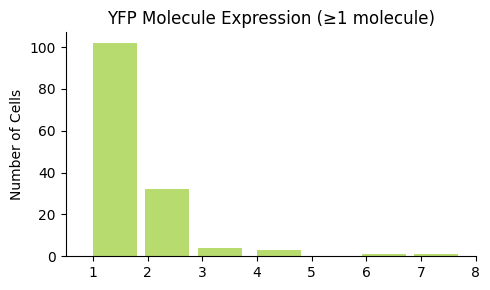

In [2]:
plt.figure(None, (5, 3))
with loompy.connect('cultures_EYFP.loom', 'r') as ds:
    
    raw_exp = ds[ds.ra.Gene == 'marker-YFP', :].flatten()
    exp = raw_exp[raw_exp >= 1]
    
    bins = 50
    counts, bin_edges, patches = plt.hist(exp, bins=bins, color='yellowgreen', alpha=0.7, width=0.8)
    plt.xlim(0.5, exp.max() + 1)
    
    plt.title('YFP Molecule Expression (≥1 molecule)')
    plt.ylabel('Number of Cells')
    
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.tight_layout()
    #plt.savefig('/figures/EYFP/YFPmolecules_histo.pdf', dpi=300)
    plt.show()

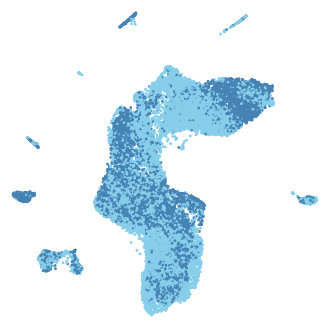

In [21]:
plt.figure(None, (4, 4))

class_color = {
    '10X353_7': 'skyblue',
    '10X355_7': 'steelblue'
}

with loompy.connect('cultures_EYFP.loom', 'r') as ds:

    labels = np.array([class_color[x] for x in ds.ca.SampleID])
    
    cells = np.random.permutation(ds.shape[1])
    plt.scatter(ds.ca.UMAP[cells, 0], ds.ca.UMAP[cells, 1], c=labels[cells], s=4, lw=0, rasterized=True)
    plt.margins(0.01, 0.01)
    plt.axis('off')

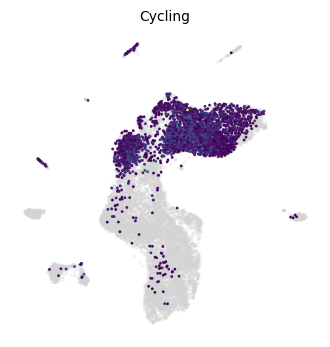

In [24]:
plt.figure(None, (4, 4))
with loompy.connect('cultures_EYFP.loom', 'r') as ds:

    exp = ds.ca.CellCycle
    ix = exp > 0.01
    plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], c='lightgrey', alpha = 0.3, lw=0, s=4)
    plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=exp[ix], cmap='viridis', lw=0, s=4) #coolwarm_r
    plt.axis('off')
    plt.title('Cycling',fontsize=10)
    #plt.savefig('/figures/EYFP/cycling.pdf', dpi=300)

# Annotations

In [46]:
Class_labels = {0: 'Erythrocytes',
                1: 'Radial glia',
                2: 'Neurons - glutamatergic deep layer 1',
                3: 'Neuroblasts - cycling',
                4: 'Glioblasts 1',
                5: 'Glioblasts 2',
                6: 'Glioblasts 3',
                7: 'Glioblasts 4',
                8: 'Neurons - Cajal-Retzius',
                9: 'Neurons - glutamatergic deep layer 2',
                10: 'Neurons - glutamatergic deep layer 3',
                11: 'Neurons - glutamatergic deep layer 4',
                12: 'Neurons - glutamatergic deep layer 5',
                13: 'Neurons - glutamatergic deep layer 6',
                14: 'Neuroblasts - noncycling',
                15: 'Neurons - glutamatergic deep layer 7',
                16: 'Neurons - glutamatergic upper layer 1',
                17: 'Neurons - glutamatergic upper layer 2',
                18: 'OPCs',
                19: 'Neurons - GABAergic 1',
                20: 'Neurons - GABAergic 2',
                21: 'Dual Neuro-ChP epithelial progenitors',
                22: 'Doublets',
                23: 'Microglia 1',
                24: 'Microglia 2'
               }

#with loompy.connect('cultures.loom') as ds:
    ds.ca.ClusterText = np.array([Class_labels[i] for i in ds.ca.Clusters])
    print(ds.ca.ClusterText)

['Erythrocytes' 'Erythrocytes' 'Erythrocytes' ... 'Microglia 2'
 'Microglia 2' 'Microglia 2']


In [47]:
Class_labels = {0: 'Erythrocytes',
                1: 'Radial glia',
                2: 'Neurons - glutamatergic deep layer',
                3: 'Neuroblasts',
                4: 'Glioblasts',
                5: 'Glioblasts',
                6: 'Glioblasts',
                7: 'Glioblasts',
                8: 'Neurons - Cajal-Retzius',
                9: 'Neurons - glutamatergic deep layer',
                10: 'Neurons - glutamatergic deep layer',
                11: 'Neurons - glutamatergic deep layer',
                12: 'Neurons - glutamatergic deep layer',
                13: 'Neurons - glutamatergic deep layer',
                14: 'Neuroblasts',
                15: 'Neurons - glutamatergic deep layer',
                16: 'Neurons - glutamatergic upper layer',
                17: 'Neurons - glutamatergic upper layer',
                18: 'OPCs',
                19: 'Neurons - GABAergic',
                20: 'Neurons - GABAergic',
                21: 'Dual Neuro-ChP epithelial progenitors',
                22: 'Doublets',
                23: 'Microglia',
                24: 'Microglia'
               }

#with loompy.connect('cultures.loom') as ds:
    ds.ca.Subclass = np.array([Class_labels[i] for i in ds.ca.Clusters])
    print(ds.ca.Subclass)

['Erythrocytes' 'Erythrocytes' 'Erythrocytes' ... 'Microglia' 'Microglia'
 'Microglia']


In [48]:
Class_labels = {0: 'Erythrocytes',
                1: 'Radial glia',
                2: 'Neurons',
                3: 'Neuroblasts',
                4: 'Glioblasts',
                5: 'Glioblasts',
                6: 'Glioblasts',
                7: 'Glioblasts',
                8: 'Neurons',
                9: 'Neurons',
                10: 'Neurons',
                11: 'Neurons',
                12: 'Neurons',
                13: 'Neurons',
                14: 'Neuroblasts',
                15: 'Neurons',
                16: 'Neurons',
                17: 'Neurons',
                18: 'OPCs',
                19: 'Neurons',
                20: 'Neurons',
                21: 'Dual Neuro-ChP epithelial progenitors',
                22: 'Doublets',
                23: 'Microglia',
                24: 'Microglia'
               }

#with loompy.connect('cultures.loom') as ds:
    ds.ca.ClassAnn = np.array([Class_labels[i] for i in ds.ca.Clusters])
    print(ds.ca.ClassAnn)

['Erythrocytes' 'Erythrocytes' 'Erythrocytes' ... 'Microglia' 'Microglia'
 'Microglia']


In [110]:
Class_labels = {0: 'Other',
                1: 'Radial glia',
                2: 'Neurons',
                3: 'Neuroblasts',
                4: 'Glioblasts',
                5: 'Glioblasts',
                6: 'Glioblasts',
                7: 'Glioblasts',
                8: 'Neurons',
                9: 'Neurons',
                10: 'Neurons',
                11: 'Neurons',
                12: 'Neurons',
                13: 'Neurons',
                14: 'Neuroblasts',
                15: 'Neurons',
                16: 'Neurons',
                17: 'Neurons',
                18: 'OPCs',
                19: 'Neurons',
                20: 'Neurons',
                21: 'Other',
                22: 'Other',
                23: 'Other',
                24: 'Other'
               }

#with loompy.connect('cultures.loom') as ds:
    ds.ca.ClassAnnNeuro = np.array([Class_labels[i] for i in ds.ca.Clusters])
    print(ds.ca.ClassAnnNeuro)

['Other' 'Other' 'Other' ... 'Other' 'Other' 'Other']


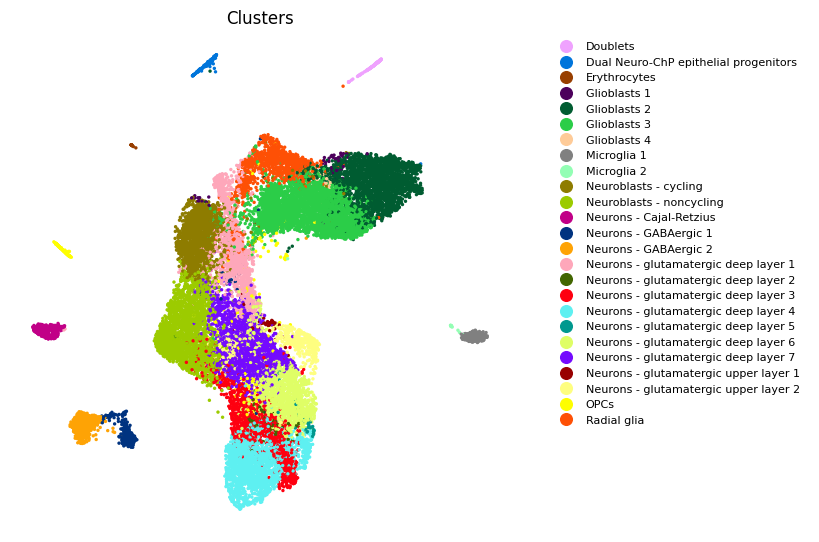

In [20]:
fig = plt.figure(None, (20, 5))
with loompy.connect('cultures_EYFP.loom', 'r') as ds:
    xy = ds.ca.UMAP
    
    names, labels = np.unique(ds.ca.ClusterText, return_inverse=True)
    colors = colorize(names)
    cells = np.random.permutation(labels.shape[0])
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    ax.scatter(xy[cells, 0], xy[cells, 1], c=colors[labels][cells], lw=0, s=6)
    ax.axis('off')
    plt.title("Clusters")
    
    ax2 = fig.add_axes([0.35, 0, 0.05, 1])
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.4,
		frameon=False,
		fontsize=8)
    ax2.axis('off')
    #plt.savefig('/figures/EYFP/annotation_clusters.pdf', dpi=300)

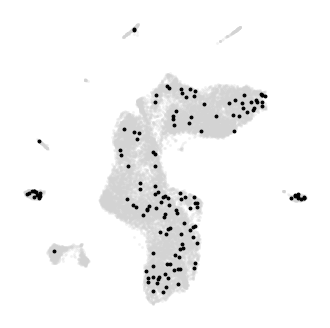

In [181]:
with loompy.connect('cultures_EYFP.loom', 'r') as ds:

    plt.figure(None, (4, 4))
    
    exp = np.log(ds[ds.ra.Gene == 'marker-YFP', :].flatten() +1)
    ix = exp > 0 
    plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], c='lightgrey', alpha=0.3, lw=0, s=4)
    plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c='black',lw=0.8, s=4)
    
    plt.axis('off')
    #plt.title('marker-EYFP', fontsize=10)
    #plt.savefig('/figures/EYFP/markerYFP_black.pdf', dpi=300)

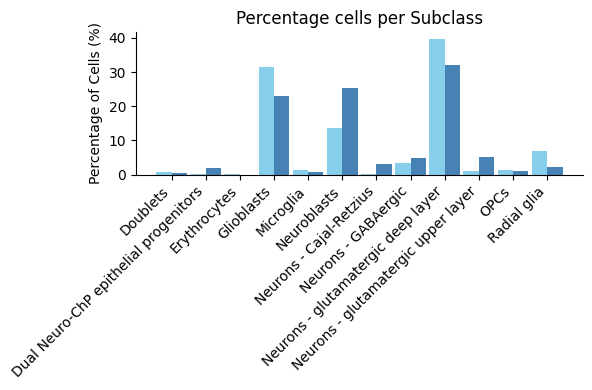

In [3]:
subclass_counts_355 = {}
subclass_counts_353 = {}

with loompy.connect('cultures_EYFP.loom', 'r') as ds:
    exp = ds.ca.SampleID == '10X355_7'
    total_cells_355 = np.sum(exp)
    for x in np.unique(ds.ca.Subclass):
        count = np.sum(exp & (ds.ca.Subclass == x))
        subclass_counts_355[x] = count / total_cells_355 * 100
    
    exp2 = ds.ca.SampleID == '10X353_7'
    total_cells_353 = np.sum(exp2)
    for x in np.unique(ds.ca.Subclass):
        count = np.sum(exp2 & (ds.ca.Subclass == x))
        subclass_counts_353[x] = count / total_cells_353 * 100

# Combine subclasses and ensure consistent order
all_subclasses = sorted(set(subclass_counts_355.keys()).union(subclass_counts_353.keys()))
values_353 = [subclass_counts_353.get(x, 0) for x in all_subclasses]
values_355 = [subclass_counts_355.get(x, 0) for x in all_subclasses]

# Plotting side-by-side bars
x = np.arange(len(all_subclasses))  # Bar positions
width = 0.45 

fig, ax = plt.subplots(figsize=(6, 4))

ax.bar(x - width/2, values_353, width, label='Sample 10X353_7', color='skyblue')
ax.bar(x + width/2, values_355, width, label='Sample 10X355_7', color='steelblue')

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_ylabel('Percentage of Cells (%)')
ax.set_title('Percentage cells per Subclass')
ax.set_xticks(x)
ax.set_xticklabels(all_subclasses, rotation=45, ha='right')
#ax.legend(loc='upper right')

plt.tight_layout()
#plt.savefig('/figures/EYFP/celltype_per_sample.pdf', dpi=300)

plt.show()

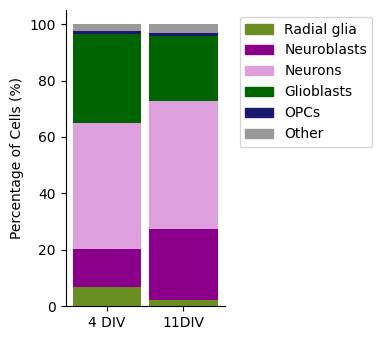

In [4]:
from matplotlib.patches import Patch

class_counts_355 = {class_name: 0 for class_name in ["Radial glia", "Neuroblasts", "Neurons", "Glioblasts", "OPCs", "Other"]}
class_counts_353 = {class_name: 0 for class_name in ["Radial glia", "Neuroblasts", "Neurons", "Glioblasts", "OPCs", "Other"]}

with loompy.connect('cultures_EYFP.loom', 'r') as ds:
    exp = ds.ca.SampleID == '10X355_7'
    total_cells_355 = np.sum(exp)  # Total cells in the first sample
    for class_name in class_counts_355.keys():
        count = np.sum(exp & (ds.ca.ClassAnnNeuro == class_name))  # Cells in current class and sample
        class_counts_355[class_name] = count / total_cells_355 * 100  # Calculate percentage
    
    exp2 = ds.ca.SampleID == '10X353_7'
    total_cells_353 = np.sum(exp2)
    for class_name in class_counts_353.keys():
        count = np.sum(exp2 & (ds.ca.ClassAnnNeuro == class_name))
        class_counts_353[class_name] = count / total_cells_353 * 100

categories = ["Radial glia", "Neuroblasts", "Neurons", "Glioblasts", "OPCs", "Other"]
values_353 = [class_counts_353[cat] for cat in categories]
values_355 = [class_counts_355[cat] for cat in categories]

colors = ["olivedrab", "darkmagenta", "plum", "darkgreen", "midnightblue", "#999999"]

# Plotting stacked bar chart
x = np.arange(2)  # Two samples
width = 0.9 

fig, ax = plt.subplots(figsize=(4, 3.5))

# Bottom positions for stacking
bottom_353 = 0
bottom_355 = 0

for i, cat in enumerate(categories):
    ax.bar(x[0], values_353[i], width, bottom=bottom_353, color=colors[i])
    ax.bar(x[1], values_355[i], width, bottom=bottom_355, color=colors[i])
    bottom_353 += values_353[i]
    bottom_355 += values_355[i]

ax.set_xticks(x)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xticklabels(['4 DIV', '11DIV'])
ax.set_ylabel('Percentage of Cells (%)')

legend_patches = [Patch(color=colors[i], label=categories[i]) for i in range(len(categories))]
ax.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1)) #, title='Class'

plt.tight_layout()
#plt.savefig('/figures/EYFP/barchart_neurogenesis2.pdf', dpi=300)
plt.show()

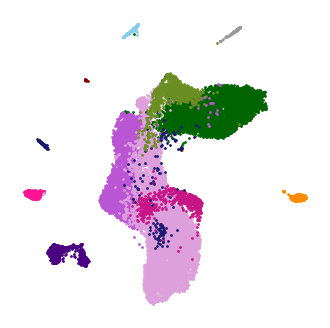

In [18]:
colors = ['#999999',"skyblue","darkred", "darkgreen","darkorange","mediumorchid","deeppink","indigo",
          "plum","mediumvioletred","midnightblue","olivedrab"]
subclass = ['Doublets', 'Dual Neuro-ChP epithelial progenitors', 'Erythrocytes',
 'Glioblasts', 'Microglia', 'Neuroblasts', 'Neurons - Cajal-Retzius',
 'Neurons - GABAergic', 'Neurons - glutamatergic deep layer',
 'Neurons - glutamatergic upper layer', 'OPCs', 'Radial glia']

plt.figure(None, (4,4))
with loompy.connect('cultures_EYFP.loom', 'r') as ds:
    
    for i,a in enumerate(subclass):
        ix = (ds.ca.Subclass == a)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=colors[i], lw=0, s=4, rasterized=True)
        plt.axis('off')
    #plt.savefig('/figures/EYFP/UMAP_subclass2.pdf', dpi=300)

In [6]:
with loompy.connect('cultures_EYFP.loom', 'r') as ds:

    exp = ds.ca.SampleID == '10X353_7'
    ix = exp & (np.log(ds[ds.ra.Gene == 'marker-YFP', :].flatten() + 1) > 0)
    ncells = len(np.unique(ds.ca.CellID[ds.ca.SampleID == '10X353_7']))
    perc = 67/ncells*100
    print(exp[ix].shape, ncells, perc)
    
    exp = ds.ca.SampleID == '10X355_7'
    ix = exp & (np.log(ds[ds.ra.Gene == 'marker-YFP', :].flatten() + 1) > 0)
    ncells = len(np.unique(ds.ca.CellID[ds.ca.SampleID == '10X355_7']))
    perc2 = 76/ncells*100
    print(exp[ix].shape, ncells, perc2)

(67,) 13582 0.49329995582388453
(76,) 8788 0.864815657715066


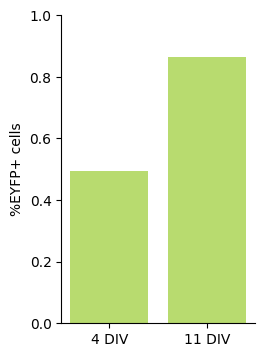

In [7]:
with loompy.connect('cultures_EYFP.loom', 'r') as ds:
    y = [perc, perc2]
    x = ['4 DIV','11 DIV']
    
    fig, ax = plt.subplots(figsize=(2.5,4))
    ax.bar(x, y, color=['yellowgreen', 'yellowgreen'], alpha=0.7)
    ax.set_ylabel('%EYFP+ cells')
    ax.set_ylim(0, 1) 
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #plt.savefig('/figures/EYFP/barchart_nYFPpersample2.pdf', dpi=300)
    plt.show()

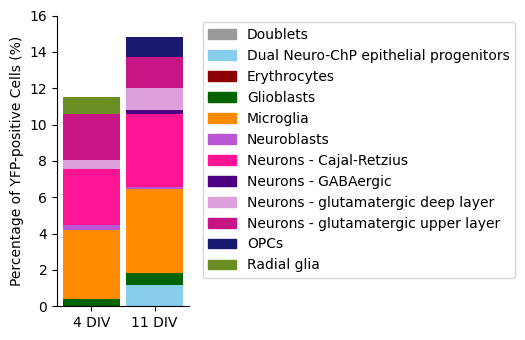

In [8]:
from matplotlib.patches import Patch

yfp_percentages_355 = {}
yfp_percentages_353 = {}

with loompy.connect('cultures_EYFP.loom', 'r') as ds:
  
    exp = ds.ca.SampleID == '10X355_7'
    for class_name in np.unique(ds.ca.Subclass):
        total_cells_in_class = np.sum(exp & (ds.ca.Subclass == class_name))  # Total cells in this class
        yfp_positive_cells = np.sum(
            exp & (ds.ca.Subclass == class_name) & (np.log(ds[ds.ra.Gene == 'marker-YFP', :].flatten() + 1) > 0)
        )  # YFP-positive cells in this class
        yfp_percentages_355[class_name] = (
            (yfp_positive_cells / total_cells_in_class * 100) if total_cells_in_class > 0 else 0
        )

    exp2 = ds.ca.SampleID == '10X353_7'
    for class_name in np.unique(ds.ca.Subclass):
        total_cells_in_class = np.sum(exp2 & (ds.ca.Subclass == class_name))
        yfp_positive_cells = np.sum(
            exp2 & (ds.ca.Subclass == class_name) & (np.log(ds[ds.ra.Gene == 'marker-YFP', :].flatten() + 1) > 0)
        )  
        yfp_percentages_353[class_name] = (
            (yfp_positive_cells / total_cells_in_class * 100) if total_cells_in_class > 0 else 0
        )

categories = list(yfp_percentages_355.keys())
values_355 = [yfp_percentages_355[cat] for cat in categories]
values_353 = [yfp_percentages_353[cat] for cat in categories]

# Plotting stacked bar chart
x = np.arange(2)  # Two samples
width = 0.9 
colors = ['#999999',"skyblue","darkred", "darkgreen","darkorange","mediumorchid","deeppink","indigo",
          "plum","mediumvioletred","midnightblue","olivedrab"]

fig, ax = plt.subplots(figsize=(5.5, 3.5))

bottom_353 = 0
bottom_355 = 0

for i, cat in enumerate(categories):
    ax.bar(x[0], values_353[i], width, bottom=bottom_353, color=colors[i], label=cat if i == 0 else "")
    ax.bar(x[1], values_355[i], width, bottom=bottom_355, color=colors[i])
    bottom_353 += values_353[i]
    bottom_355 += values_355[i]

ax.set_xticks(x)
ax.set_xticklabels(['4 DIV', '11 DIV'])
ax.set_ylabel('Percentage of YFP-positive Cells (%)')
ax.set_ylim(0, 16)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

legend_patches = [Patch(color=colors[i], label=categories[i]) for i in range(len(categories))]
ax.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1))

plt.tight_layout()
#plt.savefig('/figures/EYFP/barchart_YFP_subclass.pdf', dpi=300)
plt.show()

In [9]:
from cytograph.visualization import scatterm
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # First get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

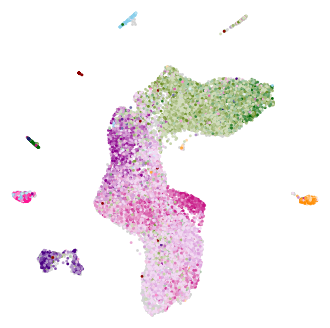

In [16]:
with loompy.connect('cultures_EYFP.loom', 'r') as ds:
    genes = ["HES1", 'BCAN',"NHLH1", "SLC17A7",'GAD2','TP73','OLIG2','AIF1','RSPO2','HBB','SATB2']
    plt.figure(None, (4, 4))
    scatterm(
        ds.ca.UMAP, 
        c=[np.log2(ds[ds.ra.Gene == g, :].flatten() + 1) for g in genes],
        cmaps=['olivedrab','darkgreen', 'darkmagenta', 'plum','indigo','deeppink','midnightblue','darkorange','skyblue','darkred','mediumvioletred'],
        bgval=0,
        labels=genes,
        s=4,
        max_percentile=99.7,
        legend=None
    ) #rasterized=True,
    plt.margins(0.01, 0.01)
    plt.axis('off')
    #plt.savefig('/figures/EYFP/scatter_all.pdf', dpi=300)

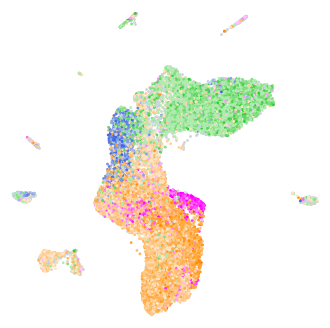

In [4]:
with loompy.connect('cultures_EYFP.loom', 'r') as ds:
    genes = ["PAX6", "EOMES", "BCL11B",'SATB2']
    plt.figure(None, (4, 4))
    scatterm(
        ds.ca.UMAP, 
        c=[np.log2(ds[ds.ra.Gene == g, :].flatten() + 1) for g in genes],
        cmaps=['limegreen', 'royalblue', 'darkorange','magenta'],
        bgval=0,
        labels=genes,
        s=4,
        max_percentile=99.7,
        legend=None
    ) #rasterized=True,
    plt.margins(0.01, 0.01)
    plt.axis('off')
    #plt.savefig('/figures/EYFP/scatter_PAX6_EOMES_BCL11B_SATB2.pdf', dpi=300)

# One month IV - HS

In [148]:
with loompy.connect('cultures_OneMIV_HS.loom', 'r') as ds:
    print(np.unique(ds.ca.SampleID))

['10X310_1' '10X310_2']


In [2]:
def umi_genes(ds: loompy.LoomConnection, out_file: str) -> None:
    plt.figure(figsize=(12, 2.5))

    ax1 = plt.subplot(131)
    for chip in np.unique(ds.ca.SampleID):
        cells = ds.ca.SampleID == chip
        plt.hist(ds.ca.TotalUMI[cells], bins=100, label=chip, alpha=0.5, range=(0, 30000))
        plt.title("UMI distribution")
        plt.ylabel("Number of cells")
        plt.xlabel("Number of UMIs")
    #plt.legend()
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

    ax2 = plt.subplot(132)
    for chip in np.unique(ds.ca.SampleID):
        cells = ds.ca.SampleID == chip
        plt.hist(ds.ca.NGenes[cells], bins=100, label=chip, alpha=0.5, range=(0, 10000))
        plt.title("Gene count distribution")
        plt.ylabel("Number of cells")
        plt.xlabel("Number of genes")
    plt.legend()
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    plt.savefig(out_file, dpi=300)

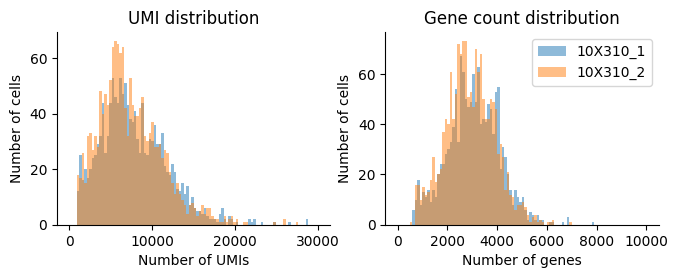

In [31]:
with loompy.connect('cultures_OneMIV_HS.loom', 'r') as ds:
    umi_genes(ds,'/figures/OneMIV_UMI.pdf')

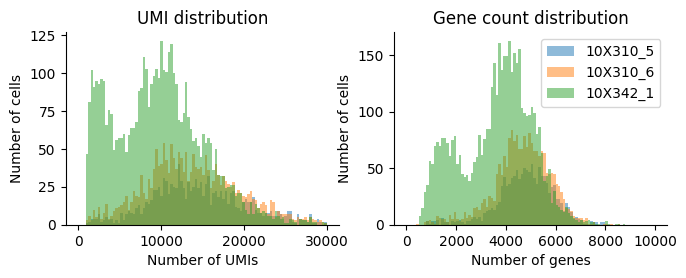

In [32]:
with loompy.connect('cultures_TwoWIV_HS.loom', 'r') as ds:
    umi_genes(ds,'/figures/TwoWIV_UMI.pdf')

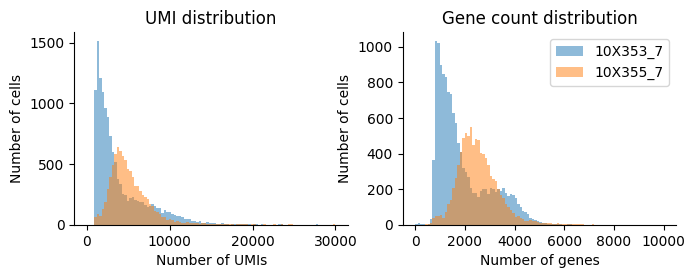

In [3]:
with loompy.connect('cultures_EYFP.loom', 'r') as ds:
    umi_genes(ds,'/figures/UMI.pdf')

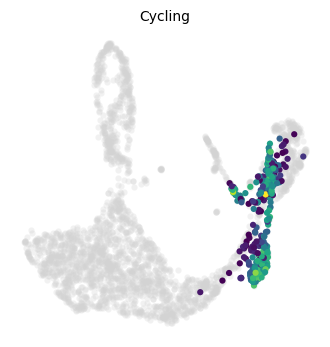

In [33]:
plt.figure(None, (4, 4))
with loompy.connect('cultures_OneMIV_HS.loom', 'r') as ds:

    exp = ds.ca.CellCycle
    ix = exp > 0.01
    plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], c='lightgrey', alpha = 0.3, lw=0, s=20)
    plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=exp[ix], cmap='viridis', lw=0, s=20) #coolwarm_r
    plt.axis('off')
    plt.title('Cycling',fontsize=10)
    #plt.savefig('/figures/OneMIV_cycling.pdf', dpi=300)

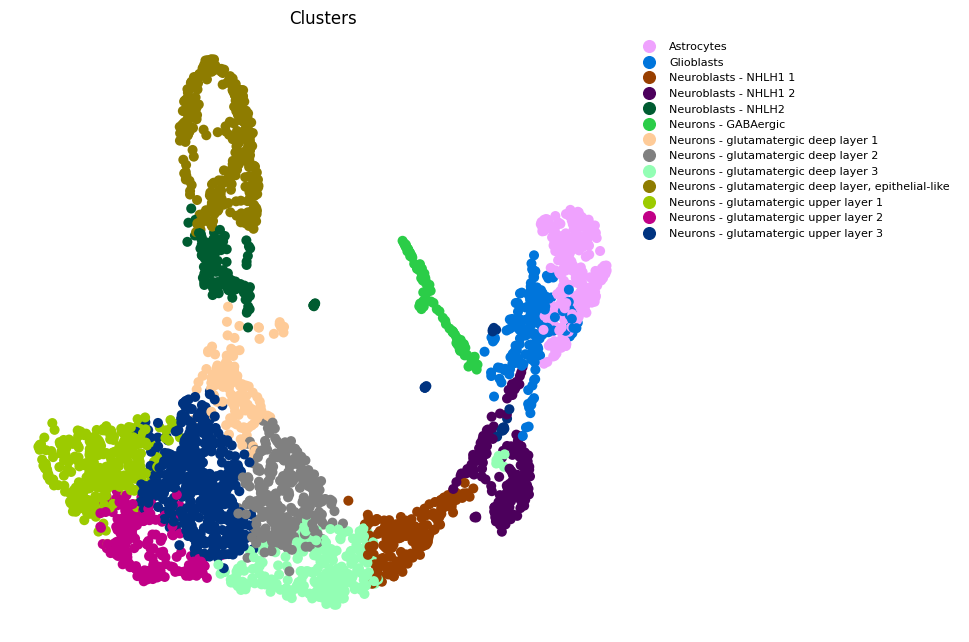

In [12]:
fig = plt.figure(None, (25, 6))
with loompy.connect('cultures_OneMIV_HS.loom', 'r') as ds:
    xy = ds.ca.UMAP
    names, labels = np.unique(ds.ca.ClusterText, return_inverse=True)
    colors = colorize(names)
    cells = np.random.permutation(labels.shape[0])
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    ax.scatter(xy[cells, 0], xy[cells, 1], c=colors[labels][cells], lw=0, s=52)
    ax.axis('off')
    plt.title("Clusters")
    
    ax2 = fig.add_axes([0.33, 0, 0.05, 1])
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.4,
		frameon=False,
		fontsize=8)
    ax2.axis('off')
    #plt.savefig('/figures/OneMIV_cluster_annotation.pdf', dpi=300)

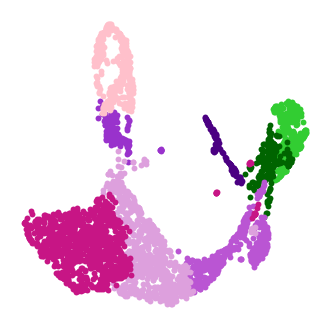

In [13]:
colors = ['limegreen',"darkgreen","mediumorchid",'darkorchid', "indigo",
          "plum",'pink', "mediumvioletred"]
subclass = ['Astrocytes','Glioblasts','Neuroblasts - NHLH1','Neuroblasts - NHLH2', 
 'Neurons - GABAergic', 'Neurons - glutamatergic deep layer','Neurons - glutamatergic deep layer, epithelial-like',
 'Neurons - glutamatergic upper layer']

plt.figure(None, (4,4))
with loompy.connect('cultures_OneMIV_HS.loom', 'r') as ds:
    
    for i,a in enumerate(subclass):
        ix = (ds.ca.Subclass == a)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=colors[i], lw=0, s=18, rasterized=True)
        plt.axis('off')
        #plt.title('genes',fontsize=13)
    #plt.savefig('/figures/OneMIV_UMAP_subclass2.pdf', dpi=300)

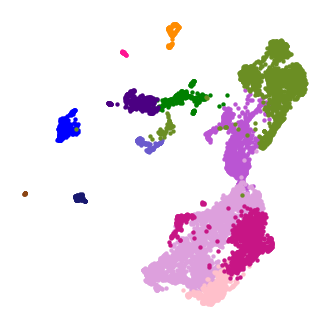

In [10]:
colors = ['saddlebrown',"green","darkorange","mediumorchid",
          "deeppink","indigo",
          'blue','slateblue',
          "plum",'pink', "mediumvioletred","midnightblue","olivedrab"]
subclass = ['Fibroblasts', 'Glioblasts-Astrocytes', 'Microglia', 'Neuroblasts', 
            'Neurons - Cajal-Retzius','Neurons - GABAergic', 
            'Neurons - glutamatergic - thalamus','Neurons - glutamatergic - ventral diencephalon',
            'Neurons - glutamatergic deep layer','Neurons - glutamatergic deep layer, epithelial-like',
 'Neurons - glutamatergic upper layer', 'OPCs', 'Radial glia']

plt.figure(None, (4,4))
with loompy.connect('cultures_TwoWIV_HS.loom', 'r') as ds:
    
    for i,a in enumerate(subclass):
        ix = (ds.ca.Subclass == a)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=colors[i], lw=0, s=10, rasterized=True)
        plt.axis('off')
        #plt.title('genes',fontsize=13)
    #plt.savefig('/figures/TwoWIV_UMAP_subclass2.pdf', dpi=300)

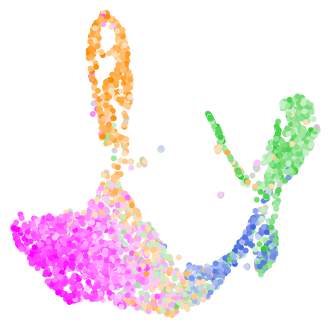

In [5]:
with loompy.connect('cultures_OneMIV_HS.loom', 'r') as ds:
    genes = ["PAX6", "EOMES", "BCL11B",'SATB2']
    plt.figure(None, (4, 4))
    scatterm(
        ds.ca.UMAP, 
        c=[np.log2(ds[ds.ra.Gene == g, :].flatten() + 1) for g in genes],
        cmaps=['limegreen', 'royalblue', 'darkorange','magenta'],
        bgval=0,
        labels=genes,
        s=18,
        max_percentile=99.7,
        legend=None
    ) #rasterized=True,
    plt.margins(0.01, 0.01)
    plt.axis('off')
    #plt.savefig('/figures/scatter_OneMIV_PAX6_EOMES_BCL11B_SATB2.pdf', dpi=300)

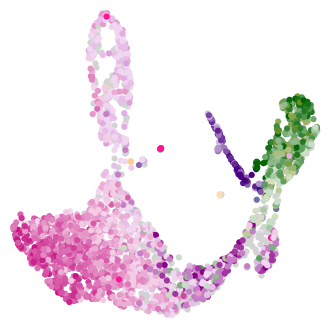

In [14]:
with loompy.connect('cultures_OneMIV_HS.loom', 'r') as ds:
    genes = ["HES1", 'BCAN',"NHLH1", "SLC17A7",'GAD2','TP73','OLIG2','AIF1','RSPO2','HBB','SATB2']
    plt.figure(None, (4, 4))
    scatterm(
        ds.ca.UMAP, 
        c=[np.log2(ds[ds.ra.Gene == g, :].flatten() + 1) for g in genes],
        cmaps=['olivedrab','darkgreen', 'darkmagenta', 'plum','indigo','deeppink','midnightblue','darkorange','skyblue','darkred','mediumvioletred'],
        bgval=0,
        labels=genes,
        s=20,
        max_percentile=99.7,
        legend=None
    ) #rasterized=True,
    plt.margins(0.01, 0.01)
    plt.axis('off')
    #plt.savefig('/figures/scatter_OneMIV_all.pdf', dpi=300)

In [162]:
Class_labels = {0: 'Neurons - glutamatergic upper layer 1',
                1: 'Neurons - glutamatergic upper layer 2',
                2: 'Neurons - glutamatergic upper layer 3',
                3: 'Neurons - glutamatergic deep layer 1',
                4: 'Neuroblasts - NHLH2',
                5: 'Neurons - glutamatergic deep layer, epithelial-like',
                6: 'Neurons - glutamatergic deep layer 2',
                7: 'Neurons - glutamatergic deep layer 3',
                8: 'Neuroblasts - NHLH1 1',
                9: 'Neuroblasts - NHLH1 2',
                10: 'Astrocytes',
                11: 'Glioblasts',
                12: 'Neurons - GABAergic'
               }

with loompy.connect('/Users/elin.vinsland/Documents/cultures_sequenced/241114_HS/data/cultures_OneMIV_HS.loom') as ds:
    ds.ca.ClusterText = np.array([Class_labels[i] for i in ds.ca.Clusters])
    print(ds.ca.ClusterText)

['Neurons - glutamatergic upper layer 1'
 'Neurons - glutamatergic upper layer 1'
 'Neurons - glutamatergic upper layer 1' ... 'Neurons - GABAergic'
 'Neurons - GABAergic' 'Neurons - GABAergic']


In [163]:
Class_labels = {0: 'Neurons - glutamatergic upper layer',
                1: 'Neurons - glutamatergic upper layer',
                2: 'Neurons - glutamatergic upper layer',
                3: 'Neurons - glutamatergic deep layer',
                4: 'Neuroblasts - NHLH2',
                5: 'Neurons - glutamatergic deep layer, epithelial-like',
                6: 'Neurons - glutamatergic deep layer',
                7: 'Neurons - glutamatergic deep layer',
                8: 'Neuroblasts - NHLH1',
                9: 'Neuroblasts - NHLH1',
                10: 'Astrocytes',
                11: 'Glioblasts',
                12: 'Neurons - GABAergic'
               }

with loompy.connect('/Users/elin.vinsland/Documents/cultures_sequenced/241114_HS/data/cultures_OneMIV_HS.loom') as ds:
    ds.ca.Subclass = np.array([Class_labels[i] for i in ds.ca.Clusters])
    print(ds.ca.Subclass)

['Neurons - glutamatergic upper layer'
 'Neurons - glutamatergic upper layer'
 'Neurons - glutamatergic upper layer' ... 'Neurons - GABAergic'
 'Neurons - GABAergic' 'Neurons - GABAergic']


In [164]:
Class_labels = {0: 'Neurons',
                1: 'Neurons',
                2: 'Neurons',
                3: 'Neurons',
                4: 'Neuroblasts',
                5: 'Neurons',
                6: 'Neurons',
                7: 'Neurons',
                8: 'Neuroblasts',
                9: 'Neuroblasts',
                10: 'Astrocytes',
                11: 'Glioblasts',
                12: 'Neurons'
               }

with loompy.connect('/Users/elin.vinsland/Documents/cultures_sequenced/241114_HS/data/cultures_OneMIV_HS.loom') as ds:
    ds.ca.ClassAnn = np.array([Class_labels[i] for i in ds.ca.Clusters])
    print(ds.ca.ClassAnn)

['Neurons' 'Neurons' 'Neurons' ... 'Neurons' 'Neurons' 'Neurons']


# Two weeks IV - HS

In [181]:
with loompy.connect('cultures_TwoWIV_HS.loom', 'r') as ds:
    print(np.unique(ds.ca.SampleID))
    print(ds.shape)

['10X310_5' '10X310_6' '10X342_1']
(33538, 7774)


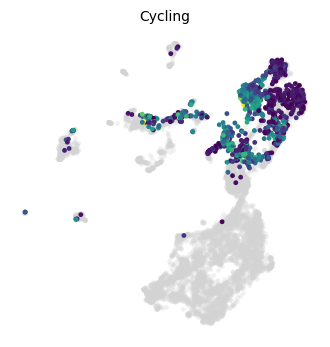

In [16]:
plt.figure(None, (4, 4))
with loompy.connect('cultures_TwoWIV_HS.loom', 'r') as ds:

    exp = ds.ca.CellCycle
    ix = exp > 0.01
    plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], c='lightgrey', alpha = 0.3, lw=0, s=12)
    plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=exp[ix], cmap='viridis', lw=0, s=12) #coolwarm_r
    plt.axis('off')
    plt.title('Cycling',fontsize=10)
    #plt.savefig('/figures/TwoWIV_cycling.pdf', dpi=300)

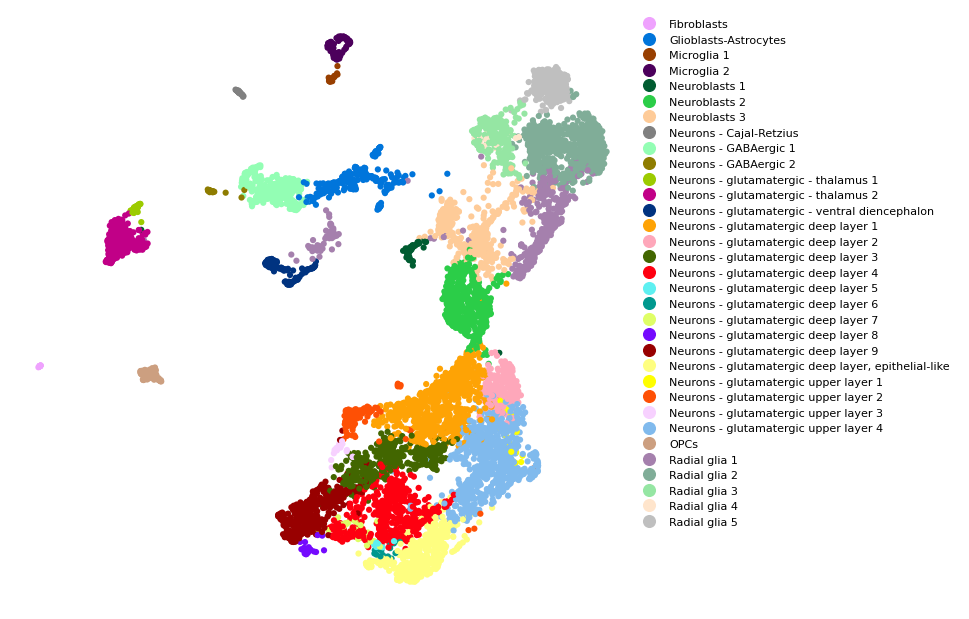

In [11]:
fig = plt.figure(None, (25, 6))
with loompy.connect('cultures_TwoWIV_HS.loom', 'r') as ds:
    xy = ds.ca.UMAP
    
    names, labels = np.unique(ds.ca.ClusterText, return_inverse=True)
    colors = colorize(names)
    cells = np.random.permutation(labels.shape[0])
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    ax.scatter(xy[cells, 0], xy[cells, 1], c=colors[labels][cells], lw=0, s=20)
    ax.axis('off')
    
    ax2 = fig.add_axes([0.33, 0, 0.05, 1])
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.4,
		frameon=False,
		fontsize=8)
    ax2.axis('off')
    #plt.savefig('/figures/TwoWIV_clustertext.pdf', dpi=300)

In [144]:
Class_labels = {0: 'Microglia 1',
                1: 'Microglia 2',
                2: 'Fibroblasts',
                3: 'Glioblasts-Astrocytes',
                4: 'Radial glia 1',
                5: 'Radial glia 2',
                6: 'Radial glia 3',
                7: 'Radial glia 4',
                8: 'Radial glia 5',
                9: 'Neuroblasts 1',
                10: 'Neuroblasts 2',
                11: 'Neuroblasts 3',
                12: 'Neurons - glutamatergic upper layer 1',
                13: 'Neurons - glutamatergic deep layer 1',
                14: 'Neurons - glutamatergic deep layer 2',
                15: 'Neurons - glutamatergic upper layer 2',
                16: 'Neurons - glutamatergic upper layer 3',
                17: 'Neurons - glutamatergic deep layer 3',
                18: 'Neurons - glutamatergic upper layer 4',
                19: 'Neurons - glutamatergic deep layer 4',
                20: 'Neurons - glutamatergic deep layer 5',
                21: 'Neurons - glutamatergic deep layer 6',
                22: 'Neurons - glutamatergic deep layer 7',
                23: 'Neurons - glutamatergic deep layer 8',
                24: 'Neurons - glutamatergic deep layer 9',
                25: 'Neurons - glutamatergic deep layer, epithelial-like',
                26: 'Neurons - glutamatergic - ventral diencephalon',
                27: 'OPCs',
                28: 'Neurons - GABAergic 1',
                29: 'Neurons - GABAergic 2',
                30: 'Neurons - glutamatergic - thalamus 1',
                31: 'Neurons - glutamatergic - thalamus 2',
                32: 'Neurons - Cajal-Retzius'
               }

with loompy.connect('/Users/elin.vinsland/Documents/cultures_sequenced/241114_HS/data/cultures_TwoWIV_HS.loom') as ds:
    ds.ca.ClusterText = np.array([Class_labels[i] for i in ds.ca.Clusters])
    print(ds.ca.ClusterText)

['Microglia 1' 'Microglia 1' 'Microglia 1' ... 'Neurons - Cajal-Retzius'
 'Neurons - Cajal-Retzius' 'Neurons - Cajal-Retzius']


In [139]:
Class_labels = {0: 'Microglia',
                1: 'Microglia',
                2: 'Fibroblasts',
                3: 'Glioblasts-Astrocytes',
                4: 'Radial glia',
                5: 'Radial glia',
                6: 'Radial glia',
                7: 'Radial glia',
                8: 'Radial glia',
                9: 'Neuroblasts',
                10: 'Neuroblasts',
                11: 'Neuroblasts',
                12: 'Neurons - glutamatergic upper layer',
                13: 'Neurons - glutamatergic deep layer',
                14: 'Neurons - glutamatergic deep layer',
                15: 'Neurons - glutamatergic upper layer',
                16: 'Neurons - glutamatergic upper layer',
                17: 'Neurons - glutamatergic deep layer',
                18: 'Neurons - glutamatergic upper layer',
                19: 'Neurons - glutamatergic deep layer',
                20: 'Neurons - glutamatergic deep layer',
                21: 'Neurons - glutamatergic deep layer',
                22: 'Neurons - glutamatergic deep layer',
                23: 'Neurons - glutamatergic deep layer',
                24: 'Neurons - glutamatergic deep layer',
                25: 'Neurons - glutamatergic deep layer, epithelial-like',
                26: 'Neurons - glutamatergic - ventral diencephalon',
                27: 'OPCs',
                28: 'Neurons - GABAergic',
                29: 'Neurons - GABAergic',
                30: 'Neurons - glutamatergic - thalamus',
                31: 'Neurons - glutamatergic - thalamus',
                32: 'Neurons - Cajal-Retzius'
               }

with loompy.connect('/Users/elin.vinsland/Documents/cultures_sequenced/241114_HS/data/cultures_TwoWIV_HS.loom') as ds:
    ds.ca.Subclass = np.array([Class_labels[i] for i in ds.ca.Clusters])
    print(ds.ca.Subclass)

['Microglia' 'Microglia' 'Microglia' ... 'Neurons - Cajal-Retzius'
 'Neurons - Cajal-Retzius' 'Neurons - Cajal-Retzius']


In [140]:
Class_labels = {0: 'Microglia',
                1: 'Microglia',
                2: 'Fibroblasts',
                3: 'Glioblasts-Astrocytes',
                4: 'Radial glia',
                5: 'Radial glia',
                6: 'Radial glia',
                7: 'Radial glia',
                8: 'Radial glia',
                9: 'Neuroblasts',
                10: 'Neuroblasts',
                11: 'Neuroblasts',
                12: 'Neurons',
                13: 'Neurons',
                14: 'Neurons',
                15: 'Neurons',
                16: 'Neurons',
                17: 'Neurons',
                18: 'Neurons',
                19: 'Neurons',
                20: 'Neurons',
                21: 'Neurons',
                22: 'Neurons',
                23: 'Neurons',
                24: 'Neurons',
                25: 'Neurons',
                26: 'Neurons',
                27: 'OPCs',
                28: 'Neurons',
                29: 'Neurons',
                30: 'Neurons',
                31: 'Neurons',
                32: 'Neurons'
               }

with loompy.connect('/Users/elin.vinsland/Documents/cultures_sequenced/241114_HS/data/cultures_TwoWIV_HS.loom') as ds:
    ds.ca.ClassAnn = np.array([Class_labels[i] for i in ds.ca.Clusters])
    print(ds.ca.ClassAnn)

['Microglia' 'Microglia' 'Microglia' ... 'Neurons' 'Neurons' 'Neurons']


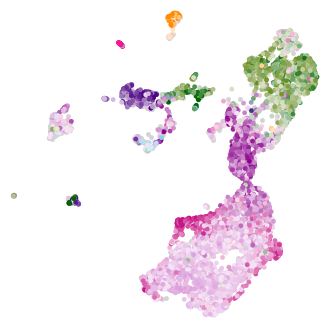

In [15]:
with loompy.connect('cultures_TwoWIV_HS.loom', 'r') as ds:
    genes = ["HES1", 'BCAN',"NHLH1", "SLC17A7",'GAD2','TP73','OLIG2','AIF1','RSPO2','HBB','SATB2']
    plt.figure(None, (4, 4))
    scatterm(
        ds.ca.UMAP, 
        c=[np.log2(ds[ds.ra.Gene == g, :].flatten() + 1) for g in genes],
        cmaps=['olivedrab','darkgreen', 'darkmagenta', 'plum','indigo','deeppink','midnightblue','darkorange','skyblue','darkred','mediumvioletred'],
        bgval=0,
        labels=genes,
        s=12,
        max_percentile=99.7,
        legend=None
    ) #rasterized=True,
    plt.margins(0.01, 0.01)
    plt.axis('off')
    #plt.savefig('/figures/scatter_TwoWIV_all.pdf', dpi=300)

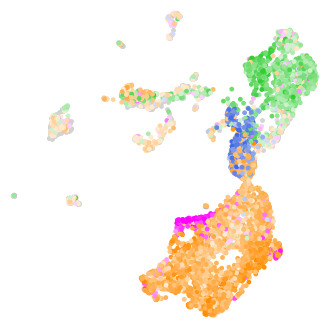

In [6]:
with loompy.connect('cultures_TwoWIV_HS.loom', 'r') as ds:
    genes = ["PAX6", "EOMES", "BCL11B",'SATB2']
    plt.figure(None, (4, 4))
    scatterm(
        ds.ca.UMAP, 
        c=[np.log2(ds[ds.ra.Gene == g, :].flatten() + 1) for g in genes],
        cmaps=['limegreen', 'royalblue', 'darkorange','magenta'],
        bgval=0,
        labels=genes,
        s=12,
        max_percentile=99.7,
        legend=None
    ) #rasterized=True,
    plt.margins(0.01, 0.01)
    plt.axis('off')
    #plt.savefig('/figures/scatter_TwoWIV_PAX6_EOMES_BCL11B_SATB2.pdf', dpi=300)